In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import*

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00611/accelerometer.csv"

In [3]:
veri=pd.read_csv(url)
veri.head()

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [4]:
veri.shape

(153000, 5)

In [5]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   wconfid  153000 non-null  int64  
 1   pctid    153000 non-null  int64  
 2   x        153000 non-null  float64
 3   y        153000 non-null  float64
 4   z        153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB


In [6]:
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
wconfid,153000.0,2.000000,0.816499,1.000,1.000,2.000,3.000,3.000
pctid,153000.0,60.000000,24.494977,20.000,40.000,60.000,80.000,100.000
x,153000.0,0.995622,0.773958,-8.000,0.945,0.992,1.039,7.996
y,153000.0,0.005351,0.742602,-8.000,-0.078,0.008,0.105,7.996
z,153000.0,-0.117769,0.517008,-5.867,-0.172,-0.125,-0.066,6.086


In [7]:
veri['wconfid'].value_counts()

1    51000
2    51000
3    51000
Name: wconfid, dtype: int64

<AxesSubplot:>

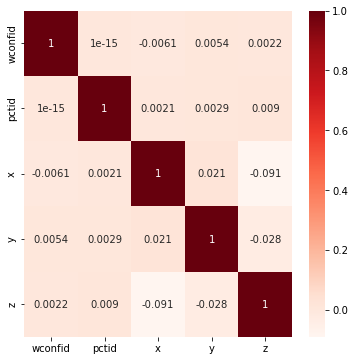

In [8]:
plt.figure(figsize=(6,6))
cor=veri.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)

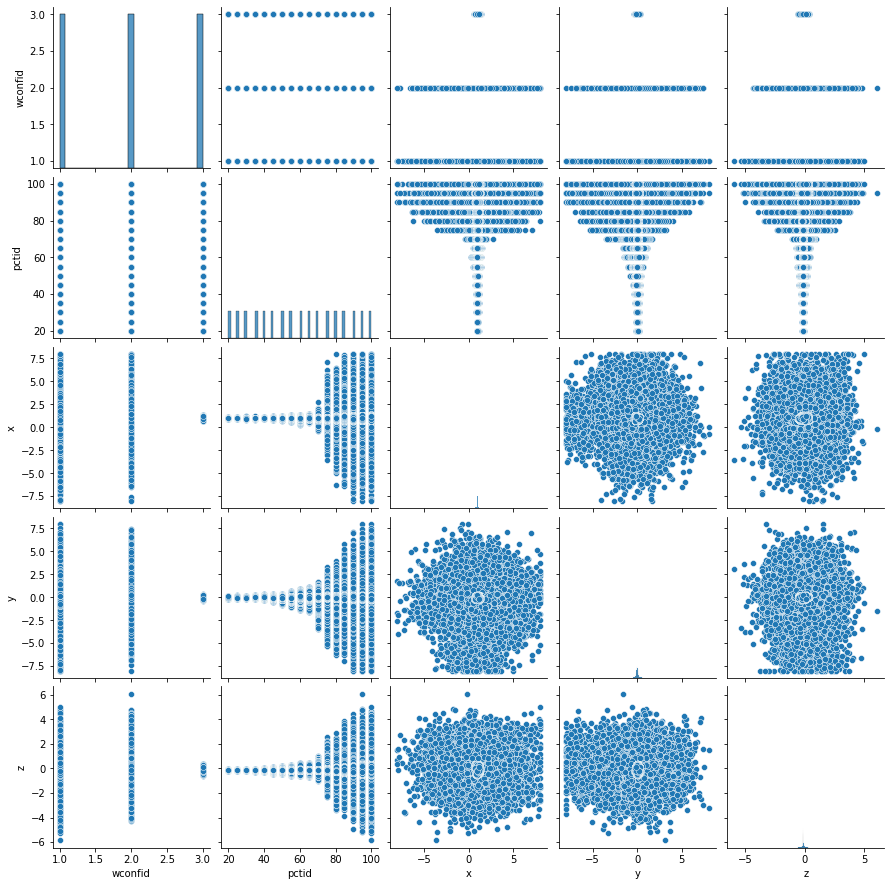

In [9]:
sns.pairplot(veri)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wconfid', ylabel='Density'>

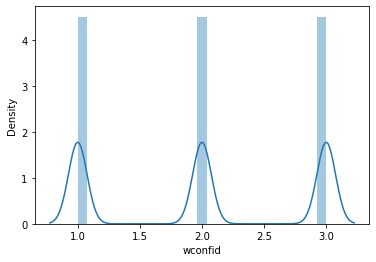

In [10]:
sns.distplot(veri['wconfid'])

In [11]:
x=veri.drop('wconfid',axis=1)
y=veri['wconfid']
x_egitim,x_test,y_egitim,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [13]:
model=[]
model.append(('model_nb',GaussianNB()))
model.append(('model_knn',KNeighborsClassifier()))
model.append(('model_lr',LogisticRegression()))
model.append(('model_tree',DecisionTreeClassifier()))


In [14]:
for name,k in model:
    kfold=KFold(n_splits=10,shuffle=True,random_state=0)
    veriler=cross_val_score(k,x_egitim,y_egitim,cv=kfold,scoring='accuracy')
    print(name," ICIN KFOLD DEGERI: ",veriler.mean())

model_nb  ICIN KFOLD DEGERI:  0.5014460784313725
model_knn  ICIN KFOLD DEGERI:  0.7175571895424836
model_lr  ICIN KFOLD DEGERI:  0.34025326797385624
model_tree  ICIN KFOLD DEGERI:  0.6668382352941176


In [15]:
for name,k in model:
    k.fit(x_egitim,y_egitim)
    tahmin_test=k.predict(x_test)
    print(name," ICIN TEST TAHMIN SONUCU = %.2f"%accuracy_score(y_test,tahmin_test))

model_nb  ICIN TEST TAHMIN SONUCU = 0.51
model_knn  ICIN TEST TAHMIN SONUCU = 0.72
model_lr  ICIN TEST TAHMIN SONUCU = 0.33
model_tree  ICIN TEST TAHMIN SONUCU = 0.67


In [ ]:
from sklearn.model_selection import GridSearchCV
model_knn=KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(1,10,1)}
scoring={'Accuracy':'accuracy'}
knn=GridSearchCV(model_knn,return_train_score=True,param_grid=param_grid,scoring=scoring,cv=10,refit='Accuracy')
knn.fit(x_egitim,y_egitim)

In [ ]:
while True:
    liste=[]
    pctid=float(input("\nSOGUTUCU FAN RPM HIZ OLCUM VERISI: "))
    x_deger=float(input("\nIVMEOLCER X DEGERI: "))
    y_deger=float(input("\nIVMEOLCER Y DEGERI: "))
    z_deger=float(input("\nIVMEOLCER Z DEGERI: "))
    liste.append(pctid)
    liste.append(x_deger)
    liste.append(y_deger)
    liste.append(z_deger)
    dene=np.array([liste])
    tahmin_dene=knn.best_estimator_.predict(dene)
    print(tahmin_dene)
    if(tahmin_dene==1):
        print("\nKIRMIZI-NORMAL KONFIGURASYON...")
    elif(tahmin_dene==2):
        print("\nMAVI-DIKEY KONFIGURASYON...")
    elif(tahmin_dene==3):
        print("\nYESIL-ZIT KONFIGURASYON...")
    cevap=str(input("\nISLEM DEVAM ETSIN MI: ")).upper()
    if(cevap=='E'):
        continue
    else:
        break